In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [7]:
df  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv")
df = df.rename(columns={'Unnamed: 0':'ID'})

In [8]:
print(df.shape)
df.head()

(803, 11)


,ID,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


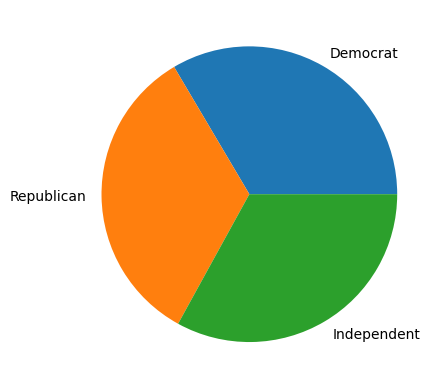

In [9]:
plt.pie(df['PoliticalParty'].value_counts().values, labels= df['PoliticalParty'].unique())
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


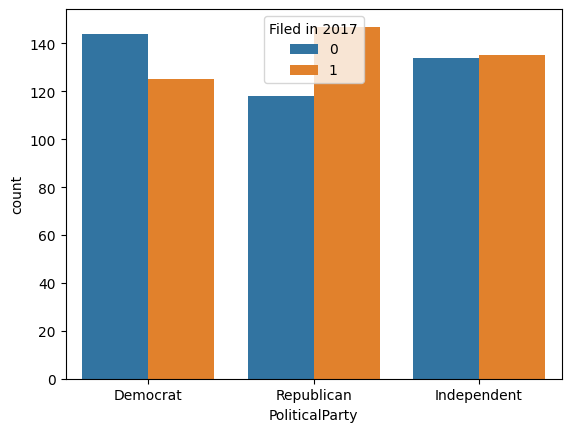

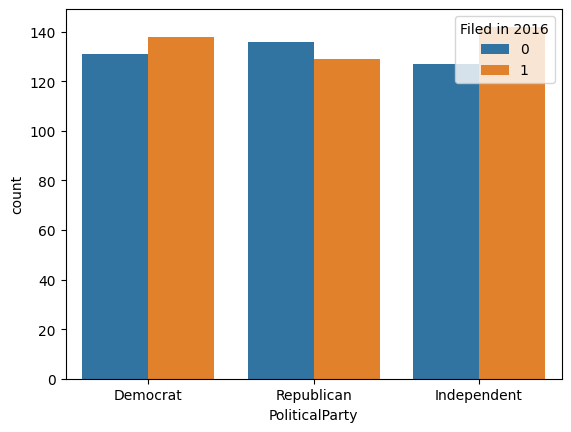

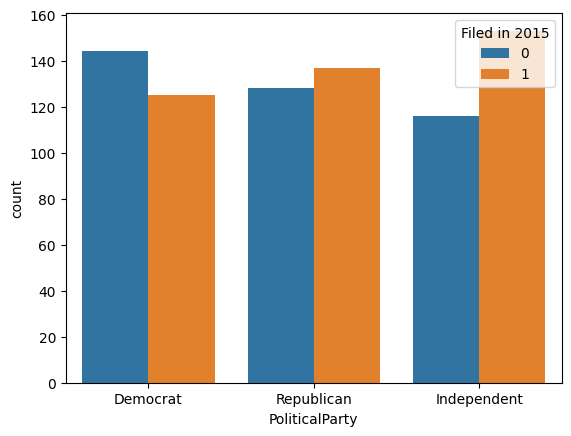

In [13]:
sb.countplot(x = df['PoliticalParty'], hue = df['Filed in 2017'])
plt.show()
sb.countplot(x = df['PoliticalParty'], hue = df['Filed in 2016'])
plt.show()
sb.countplot(x = df['PoliticalParty'], hue = df['Filed in 2015'])
plt.show()

In [15]:
df.groupby(['PoliticalParty','Married']).mean()[['HHI','HHDL']]

HHI          HHDL
PoliticalParty Married                             
Democrat       0        154576.979381  30477.886598
               1        138114.720430  -3451.967742
               2        143913.063291 -83651.683544
Independent    0        156734.436170  30307.968085
               1        165414.147727 -41986.761364
               2        154060.505747 -63018.229885
Republican     0        157484.100000   7190.150000
               1        162356.291262 -60729.893204
               2        165444.134146  44567.609756

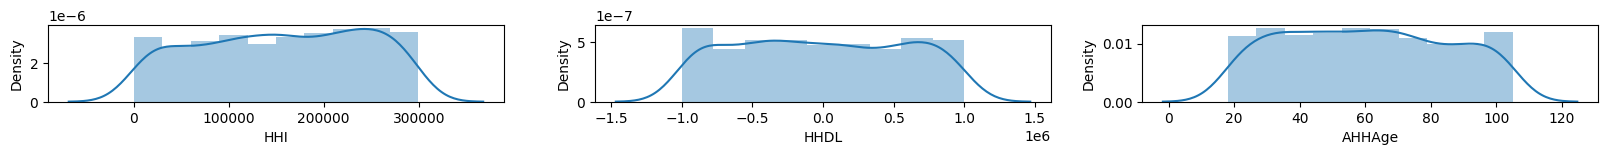

In [25]:
ord = ['HHI', 'HHDL', 'AHHAge']
plt.subplots(figsize = (20,1))
for i, col in enumerate(ord):
    plt.subplot(1,3,i+1)
    sb.distplot(df[col])
plt.show()

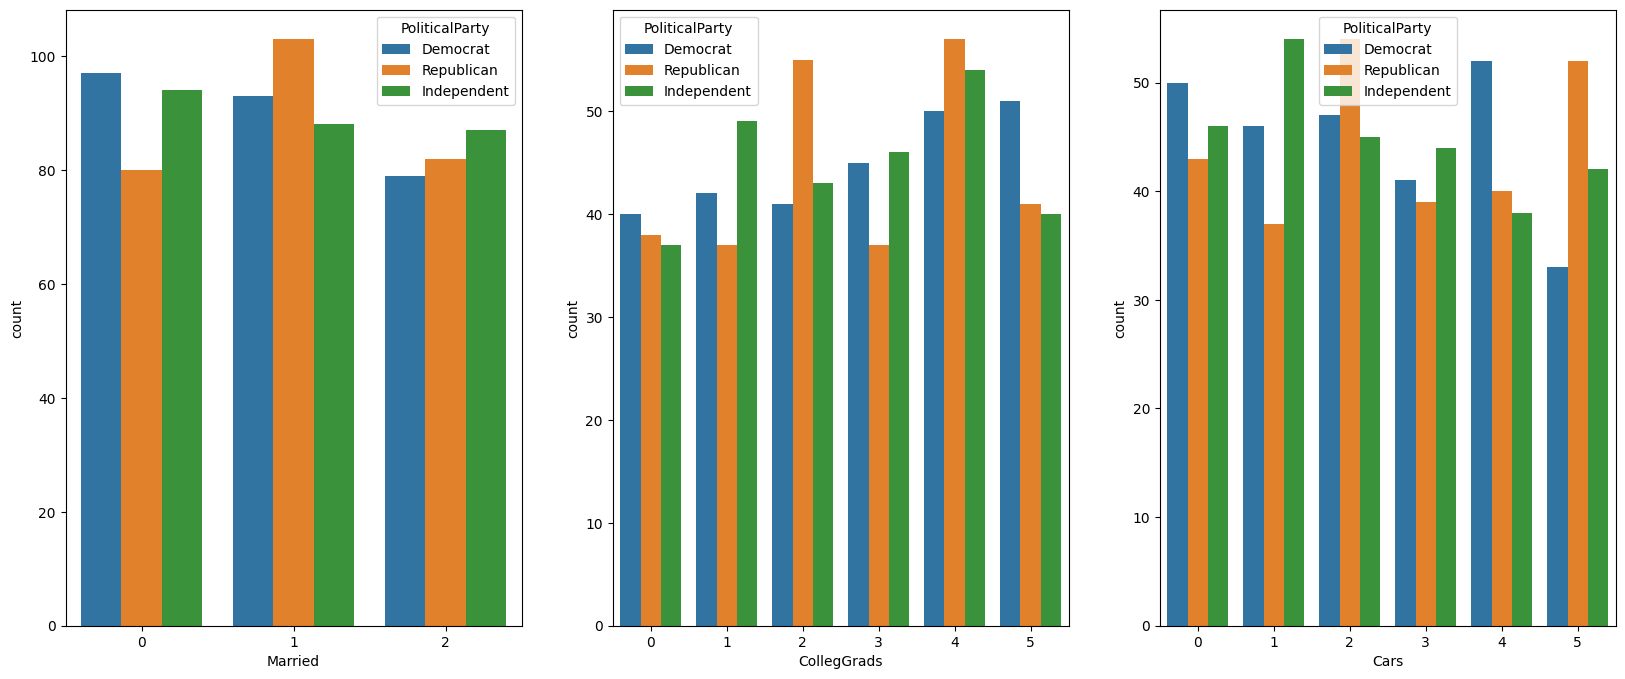

In [31]:
ord = ['Married', 'CollegGrads', 'Cars']

plt.subplots(figsize=(20,8))
for i, col in enumerate(ord):
  plt.subplot(1,3,i+1)
  sb.countplot(x= df[col], hue=df['PoliticalParty'])
plt.show()

In [32]:
df.groupby('CollegGrads').mean()[['HHI', 'HHDL']]

,HHI,HHDL
CollegGrads,,
0,151377.434783,-47556.078261
1,156152.898438,16887.570312
2,168170.467626,-76711.683453
3,157917.843750,56275.234375
4,152016.422360,-34292.875776
5,146428.484848,-294.462121


In [33]:
df['total'] = df['Filed in 2015'] + df['Filed in 2016'] + df['Filed in 2017']
df.groupby('total').mean()[['HHI','HHDL']] 

,HHI,HHDL
total,,
0,140412.506024,-97822.939759
1,152288.810631,-28731.232558
2,158830.009174,7718.204893
3,166932.347826,20831.478261


In [34]:
df['net'] = df['HHI'] + df['HHDL']
df.groupby('PoliticalParty').mean()['net']

PoliticalParty
Democrat       130983.669145
Independent    135183.174721
Republican     154197.818868
Name: net, dtype: float64

In [40]:
le = LabelEncoder
df['PoliticalParty'] = le.fit_transform(df['PoliticalParty'])
labels = le.classes_
labels

TypeError: fit_transform() missing 1 required positional argument: 'y'